In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

### Часть 1

1. Берем, для начала, данные за 1880 год из скачанного и извлеченного архива и присваиваем имена колонкам: имя, пол, количество родившихся (как на сайте).
2. Находим, сколько всего уникальных имен мальчиков и девочек.
3. Находим, сколько всего родилось мальчиков и девочек.

In [2]:
names_1880 = pd.read_csv('C:/Users/79653/Desktop/ввад/names/yob1880.txt',names = ['Name','Sex','Births']) 
display(names_1880.groupby('Sex')[['Name']].nunique())
names_1880.groupby('Sex')[['Births']].sum()

,Name
Sex,
F,942
M,1058


,Births
Sex,
F,90994
M,110490


Видим, что мальчиков больше, чем девочек, скорее всего, именно поэтому у них больше уникальных имен

### Часть 2

1. Собираем единую таблицу из разных файлов (данные по всем годам из архива)
2. Строим сводную таблицу по годам для количества рожденных мальчиков и девочек
3. Рисуем график рождаемости

In [3]:
years = range(1880,2020)
df_list = []
for year in years:
    path = 'C:/Users/79653/Desktop/ввад/names/yob%d.txt' %year
    df = pd.read_csv(path, names = ['Name','Sex','Births'])
    df['Year'] = year
    df_list.append(df)
names = pd.concat(df_list,ignore_index = True)
names.head()

,Name,Sex,Births,Year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [4]:
df_graf = names.pivot_table(index = 'Year',columns = 'Sex',values = 'Births', aggfunc = 'sum')
df_graf.head()

Sex,F,M
Year,,
1880,90994,110490
1881,91953,100743
1882,107847,113686
1883,112319,104625
1884,129019,114442


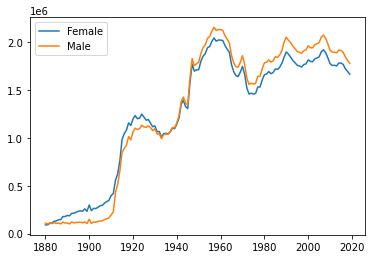

In [5]:
plt.plot(years,df_graf.F,label='Female');
plt.plot(years,df_graf.M,label='Male');
plt.legend(loc='best');

Видим, что до где-то 1930 численность девочек превышала численность мальчиков, а потом ситуация меняется с точностью наоборот

### Часть 3.

1. Найдем для каждого имени долю детей с данным именем относительно общего количества родившихся детей в году в зависимости от пола.
2. Отберем 1000 самых популярных имен для каждого года в зависимости от пола.

In [6]:
def add_percent(group_df):
    group_df['Percent'] = group_df.Births / group_df.Births.sum()
    return group_df
names_pct = names.groupby(['Year','Sex']).apply(add_percent)
names_pct.head()

,Name,Sex,Births,Year,Percent
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188


In [7]:
def get_top_1000(df_group):
    return df_group.sort_values(by = 'Births', ascending = False)[:1000]
top_1000 = names_pct.groupby(['Year','Sex']).apply(get_top_1000).reset_index(drop = True)
top_1000.head()

,Name,Sex,Births,Year,Percent
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188


### Часть 4.

Визуализация:

Найдем по два самых популярных в истории имени мальчиков и девочек и для них построим графики:
1.	В абсолютном значении - как менялось количество родившихся мальчиков с двумя самыми популярными именами в зависимости от года.
2.	В относительном значении (проценты) - как менялось количество родившихся девочек с двумя самыми популярными именами в зависимости от года.
3. В абсолютном значении график для всех четывех имен.

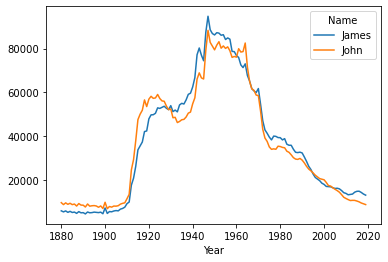

In [8]:
boys = top_1000[top_1000['Sex'] == 'M']
boys_2 = boys.groupby('Name').sum()['Births'].nlargest(2)
boys.pivot_table(index = 'Year',columns = 'Name',values = 'Births',aggfunc = 'sum')[boys_2.index].plot();

Особая популярность этих имен у мужчин была в период с 1910 по 1970 гг

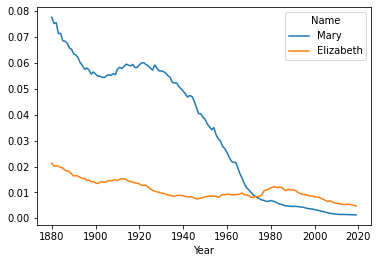

In [9]:
girls = top_1000[top_1000['Sex'] == 'F']
girls_2 = girls.groupby('Name').sum()['Percent'].nlargest(2)
girls.pivot_table(index = 'Year',columns = 'Name',values = 'Percent',aggfunc = 'sum')[girls_2.index].plot();

Имя Mary вплоть до 1970х было намного популярнее имени Elizabeth, потом ситуация поменялась

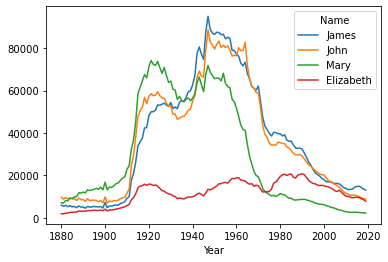

In [10]:
top_1000.pivot_table(index = 'Year',columns = 'Name',values = 'Births',aggfunc = 'sum')[boys_2.index.tolist() + 
                                                                                        girls_2.index.tolist()].plot();

Видим, что гдето-то в 1960х произошел спад популярности сразу трех самых популярных имен, возможно, это связано с тем, что стало больше имен, расширился выбор

### Часть 5.

Строим зависимость, отражающую растущее разнообразие имен в зависимости от года.

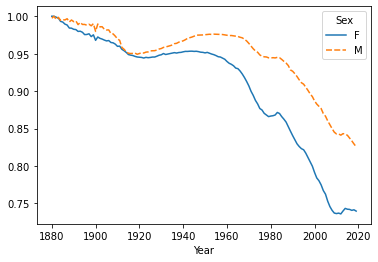

In [11]:
sns.lineplot(data = top_1000.pivot_table(index = 'Year',columns = 'Sex',values = 'Percent',aggfunc = 'sum'));

Видим, что 1000 популярных имен с каждым годом занимает все меньшую долю от общего количества имен, следовательно, можно сделать вывод о растущем разнообразии имен в мире, особенно это заметно после 1980 года

### Часть 6.

Проанализируем смену половой предпочтительности имени Leslie-Lesly (корень Lesl), построим график. 

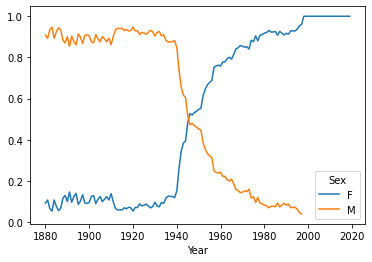

In [12]:
les_name = pd.Series(top_1000.Name.unique()).str.lower()[
    pd.Series(top_1000.Name.unique()).str.lower().str.contains('lesl')].values
les_table = top_1000[top_1000['Name'].str.lower().isin(les_name)]
pvt = les_table.pivot_table(index = 'Year', columns = 'Sex', values = 'Births', aggfunc = 'sum')
pvt = pvt.div(pvt.sum(axis = 1),axis = 0)
pvt.plot();

Видим, что в 1940 году имя с этим корнем поменяло свою половую принадлежность и стало женским. а не мужским